# Curve Fitting - Method of least squares

In [143]:
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.array( [1, 2, 3, 4, 5] )
y_data = np.array( [2.18, 2.44, 2.78, 3.25, 3.83] )

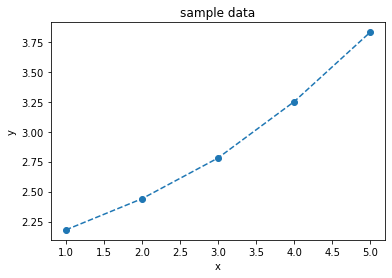

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title="sample data", xlabel="x", ylabel="y")
ax.plot(x_data, y_data, 'o--')

## Adddding correction to x data to simplify the calculation

In [4]:
x_mean = x_data.mean()
x_corr_factor = 0#round(x_mean)
x_corr = x_data - x_corr_factor

y_mean = y_data.mean()
y_corr_factor = 0 #round(y_mean)
y_corr = y_data - y_corr_factor

In [6]:
xy   = []
x2   = []
x3   = []
x4   = []
x2y  = []
y2   = []

for i, x in enumerate(x_corr):
    x2.append(x**2)
    x3.append(x**3)
    x4.append(x**4)
    xy.append(x * y_corr[i])
    x2y.append(x**2 * y_corr[i])
    y2.append(y_corr[i] ** 2)

xy  = np.array(xy)
x2  = np.array(x2)
x3  = np.array(x3)
x4  = np.array(x4)
x2y = np.array(x2y)
y2  = np.array(y2)

x_sum   = x_corr.sum()
y_sum   = y_data.sum()
xy_sum  = xy.sum()
x2_sum  = x2.sum()
x3_sum  = x3.sum()
x4_sum  = x4.sum()
x2y_sum = x2y.sum()
y2_sum  = y2.sum()

n = len(x_data)

In [15]:
print ("{:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format('x','y', 'x_cr', 'y_cr', 'x^2', 'x^3', 'x^4', 'xy', 'x^2y'))
print()
for i, x in enumerate(x_corr):
    print ("{:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(x_data[i], y_data[i], x, y_corr[i], x2[i], x3[i], x4[i], xy[i], x2y[i]))

print("----------------------------------------------------------------------------------------------")
print ("{:<8}   {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(' ', ' ',x_sum, y_sum, x2_sum, x3_sum, x4_sum, xy_sum, x2y_sum))    

x        | y        | x_cr     | y_cr     | x^2      | x^3      | x^4      | xy       | x^2y    

1        | 2.18     | 1        | 2.18     | 1        | 1        | 1        | 2.18     | 2.18    
2        | 2.44     | 2        | 2.44     | 4        | 8        | 16       | 4.88     | 9.76    
3        | 2.78     | 3        | 2.78     | 9        | 27       | 81       | 8.34     | 25.02   
4        | 3.25     | 4        | 3.25     | 16       | 64       | 256      | 13.0     | 52.0    
5        | 3.83     | 5        | 3.83     | 25       | 125      | 625      | 19.15    | 95.75   
----------------------------------------------------------------------------------------------
                    | 15       | 14.48    | 55       | 225      | 979      | 47.55    | 184.71  


## Calculating the parameters for the parabola using the formulas:-
### $Σy = a.n + bΣx + cΣx^2$
### $Σxy = a.Σx + bΣx^2 + cΣx^3$
### $Σx^2y = a.Σx^2 + bΣx^3 + cΣx^4$

In [21]:
eq1 = np.array( [n, x_sum, x2_sum] )
eq2 = np.array( [x_sum, x2_sum, x3_sum] )
eq3 = np.array( [x2_sum, x3_sum, x4_sum] )
eq = np.array([eq1, eq2, eq3])
s  = np.array([y_sum, xy_sum, x2y_sum])

soln = np.linalg.solve(eq, s)
print(soln)

[2.048 0.081 0.055]


## Predicting the values

In [19]:
y_pred = []
for i, x in enumerate(x_corr):
    xc = x+x_corr_factor
    y = soln[0] + soln[1]*xc + soln[2]*(xc**2) + y_corr_factor
    y_pred.append(y)
print(y_pred)

[2.1840000000000024, 2.4299999999999993, 2.7859999999999983, 3.2519999999999993, 3.828000000000002]


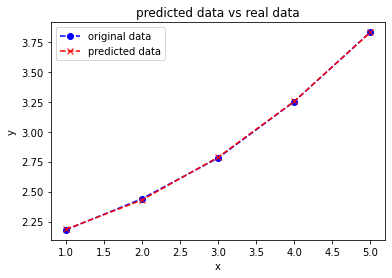

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title="predicted data vs real data", xlabel="x", ylabel="y")

ax.plot(x_data, y_data, 'o--', color = "blue", label="original data")
ax.plot(x_data, y_pred, 'x--', color = "red", label="predicted data")
ax.legend(loc='upper left')

In [23]:
print ("{:<5} |  {:<5} | {:<4} | {:<8}  | {:<4}".format('x','y','y_pred', 'diff', 'diff_sq'))
print("---------------------------------------------")
for i, x in enumerate(x_corr):
    diff = y_data[i] - y_pred[i]
    print ("{:<5} |  {:<5} | {:0.3f} | {:<8}  | {:<0.2f}".format(x, y_data[i], y_pred[i], str(round(diff, 3)) , diff**2))

x     |  y     | y_pred | diff      | diff_sq
---------------------------------------------
1     |  2.18  | 2.184 | -0.004    | 0.00
2     |  2.44  | 2.430 | 0.01      | 0.00
3     |  2.78  | 2.786 | -0.006    | 0.00
4     |  3.25  | 3.252 | -0.002    | 0.00
5     |  3.83  | 3.828 | 0.002     | 0.00
